<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Talleres/Taller%205/Taller%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

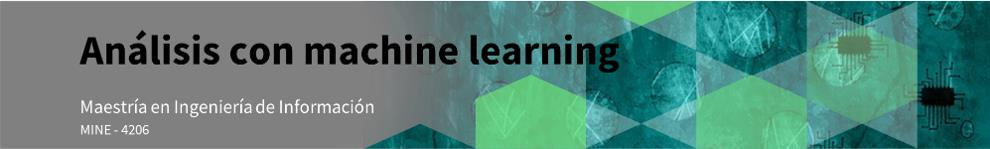

- **Integrante 1:**
- **Integrante 2:**

---
# Contexto y objetivos.

Uno de los esquemas más importantes que han evolucionado gracias a la tecnología es el ambiente financiero. El cual ha facilitado a los usuarios préstamos a sus clientes para diferentes invesiones que puedan requerir los usuarios y generar utilidades mediante este tipo de transacciones.

Los bancos incurren en pérdidas cuando un cliente no paga sus préstamos a tiempo. Debido a esto, cada año, los bancos tienen pérdidas en crores, y esto también impacta en gran medida el crecimiento económico del país. En este hackathon, analizamos varios atributos como el monto financiado, la ubicación, el préstamo, el saldo, etc., para predecir si una persona será un incumplidor de préstamos o no.

Por esta razón, la entidad financiera cuenta con una base de datos que registra la información de los préstamos y el estado de cartera, dónde se conoce si el usuario se encuentra o no en mora.

**Objetivos de desarrollo**:

* Resolver un problema de detección de anomalías.
* Realizar el entrenamiento de una sola clase.
* Analizar la Arquitectura de los AutoEncoders.
* Guardar el el autoencoder entrenado en modo competencia.

**Datos**: La fuente de datos inicial fue tomada del dataset [Bank Loan Defaulter Prediction](https://www.kaggle.com/datasets/ankitkalauni/bank-loan-defaulter-prediction-hackathon), no obstante, la información ha sido preparada para trabajar en el modelamiento.

# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **ID** | Identificador único de la instancia.|
| **Loan Amount** | Valor del monto del préstamo.|
| **Funded Amount** | Valor financiado del préstamo.|
| **Funded Amount Investor** | Inversor de la canidad financiada.|
| **Term** | Plazo del préstamo (en meses).|
| **Interest Rate** | Tasa de interés del préstamo.|
| **Grade** | Calificación del banco.|
| **Employment Duration** | Tiempo laborado.|
| **Home Ownership** | Propietario de la vivienda.|
| **Verification Status** | Estado de verificación de ingresos por parte del banco.|
| **Debit to Income** | Relación entre el pago mensual de la dueda, dividida entre los ingresos mensuales autodeclarados. Exlucye la hipoteca. |
| **Delinquency - two years** | Tiempo reportado como moroso (30+número de días) en los 2 últimos años.|
| **Inquires - six months** | Número total de consultas en los 6 últimos meses.|
| **Open Account** | Número de líneas de crédito abiertas en la línea de crédito del representante.|
| **Public Record** | Número de registros públicos desfavorables.|
| **Revolving Balance** | Saldo total de crédito rotativo.|
| **Revolving Utilities** | Cantidad de crédito que está utilizando un representante en relación con **Revolving Balance**.|
| **Total Accounts** | Número total de líneas de crédito disponibles en la línea de crédito del representante.|
| **Initial List Status** | Estado de listado único del préstamo - W (En espera), F (Enviado).|
| **Total Received Interest** | Intereses totales recibidos hasta la fecha.|
| **Total Received Late Fee** | Total de tarifas por mora recibidas hasta la fecha.|
| **Recoveries** | Recuperación bruta posterior a la cancelación de la deuda.|
| **Collection Recovery Fee** | Tarifa de cobranza posterior a la cancelación de la deuda.|
| **Collection 12 months Medical** | Cobranzas totales en los últimos 12 meses excluyendo las colecciones médicas.|
| **Application Type** | Indica si la representación es individual o conjunta.|
| **Last week Pay** | Indica cuánto tiempo (en semanas) un representante ha pagado EMI después de la inscripción en el lote.|
| **Accounts Delinquent** | Número de cuentas en las que el representante está en mora.|
| **Total Collection Account** | Saldo total actual de todas las cuentas.|
| **Total Current Balance** | Saldo total actual de todas las cuentas.|
| **Total Revolving Credit Limit** | Límite total de crédito rotativo.|
| **Loan Status** | Estado de cuenta, 1 indica se encuentra en mora y 0 se encuentra al día.|

# Actividades a realizar.

1. Realizar el análisis exploratorio de la información.

2. Generar un pipeline para el tratamiento de la información.

3. Diseñar un autoencoder el cuál sea entrenado a partir de la clase normal. Tenga en cuenta que la métrica debe ser el **accuracy**. La arquitectura debe tener el número de capas que considere adecuado para el contexto de un autoencoder. Realice la interpretación de los resultados obtenidos.

4. Construir las gráficas de entrenamiento, validación. Debes interpretar los resultados obtenidos para este modelo base.

5. Realizar la identificación de hiperparámetros, justificando la elección de los valores correspondientes.

6. Reconstruir los resultados usando el mejor modelo y usando los datos de prueba. Realice el proceso de interpretación de los resultados obtenidos.

7. **Bono**: Almacena el joblib de la preparación de los datos y el autoencoder, de esta forma serán evaluados los resultados obtenidos y publicados en un ranking, los 3 mejores grupos con los resultados obtenidos evaluando datos nuevos y evaluando la métrica, obtendrán la bonificación de este taller.

**Entregables**: Debe cargar a bloque neón la siguiente información:

* Notebook ejecutado. En la última línea del notebook, especifique una variable denominada **encorder_fields**, dónde se encuentren las columnas que finalmente usará el modelo.
* Archivo HTML del notebook ejecutado.
* Joblib de preparación de datos.
* Modelo del autoencoder del mejor modelo obtenido.

In [1]:
import pandas as pd

In [2]:
normal = pd.read_csv("https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202410_AML/main/Talleres/Taller%205/normal.csv")
normal

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,B,MORTGAGE,176346.62670,Not Verified,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,C,RENT,39833.92100,Source Verified,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,F,MORTGAGE,91506.69105,Source Verified,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,C,MORTGAGE,108286.57590,Source Verified,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,C,MORTGAGE,44234.82545,Source Verified,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61217,7273094,11440,17672,22965.76290,59,15.025260,C,RENT,76128.78634,Verified,...,0.061096,0.325564,0,INDIVIDUAL,151,0,38,859647,21468,0
61218,35182714,8323,11046,15637.46301,59,9.972104,C,RENT,65491.12817,Source Verified,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
61219,16435904,15897,32921,12329.45775,59,19.650943,A,MORTGAGE,34813.96985,Verified,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
61220,5300325,16567,4975,21353.68465,59,13.169095,D,OWN,96938.83564,Not Verified,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [3]:
test = pd.read_csv("https://raw.githubusercontent.com/fcastellanosp/MINE-4206_202410_AML/main/Talleres/Taller%205/test.csv")
test

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Home Ownership,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,2567369,13778,11656,26105.702520,59,13.382068,A,MORTGAGE,49537.72103,Verified,...,5.090907,1.171816,0,INDIVIDUAL,53,0,30,305148,1604,0
1,60690195,23891,25795,13254.362100,59,11.307417,D,MORTGAGE,72171.74951,Verified,...,6.579831,0.551025,0,INDIVIDUAL,60,0,45,151330,20090,0
2,33860189,3500,3500,3500.000000,36,10.150000,B,RENT,43000.00000,Not Verified,...,0.000000,0.000000,0,INDIVIDUAL,65,0,0,32926,8700,0
3,24927916,16588,9495,12123.544890,59,10.857981,B,RENT,66775.05376,Source Verified,...,3.165733,1.170445,0,INDIVIDUAL,10,0,25,44232,88161,0
4,8658608,9179,34461,2120.247381,59,17.392819,C,RENT,105507.03900,Source Verified,...,0.133916,0.547749,0,INDIVIDUAL,116,0,32,17616,24383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28907,11791863,20531,14637,20873.672020,58,8.816036,C,MORTGAGE,54832.47671,Source Verified,...,8.240559,0.263531,0,INDIVIDUAL,38,0,54,107593,30035,0
28908,7781823,9048,18664,8055.725617,59,8.206810,C,RENT,64463.45373,Source Verified,...,3.930009,0.883955,0,INDIVIDUAL,2,0,28,352559,1735,1
28909,4239688,29084,31199,10128.795360,59,11.977165,C,RENT,68783.92330,Verified,...,1.619850,0.906886,0,INDIVIDUAL,6,0,59,203771,3191,0
28910,14600261,12778,21387,7615.936459,59,10.311443,D,RENT,154143.34970,Verified,...,0.823018,0.105983,0,INDIVIDUAL,36,0,38,315029,1385,0
